In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import pickle


In [129]:
df=pd.read_csv('Social_Network_Ads.csv')

In [130]:
df.head(10)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [131]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: >

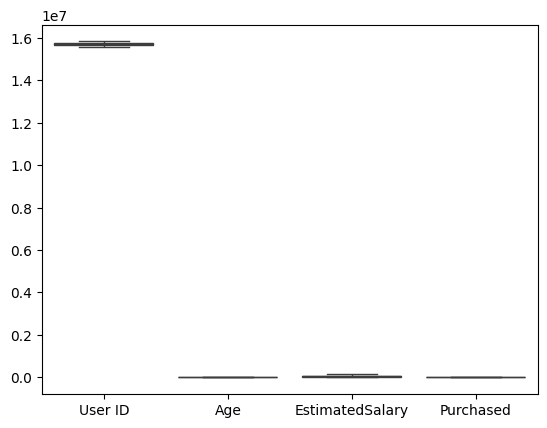

In [132]:
import seaborn as sns
sns.boxplot(df)

No outliers are founded


In [133]:
df=df.drop(['User ID'],axis=1)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [134]:
#3 Converting gender into two binary classes.
label_encoder_gender=LabelEncoder()
df['Gender']=label_encoder_gender.fit_transform(df[['Gender']])
df


C:\Users\ROHAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [135]:
x=df.drop('Purchased',axis=1)
y=df['Purchased']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)


In [136]:
y


0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [137]:
from sklearn.preprocessing import StandardScaler

# Assume X is your DataFrame with Age and EstimatedSalary
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



In [138]:
print(x_train_scaled.shape)  # → (320, 2)
print(y_train.shape)         # → (320,)


(320, 3)
(320,)


In [139]:
print(df['Purchased'].value_counts())


Purchased
0    257
1    143
Name: count, dtype: int64


# Using Logistic Regression

In [140]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [141]:
# # Then train the model
# from sklearn.linear_model import LogisticRegression

# log_model = LogisticRegression()
# log_model.fit(x_train_scaled, y_train)

# log_preds = log_model.predict(x_test_scaled)
# print("📘 Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
# print(classification_report(y_test, log_preds))


In [142]:
# # Ploting confusion matrix
# sns.heatmap(confusion_matrix(y_test, log_preds), annot=True, fmt='d', cmap='Blues')
# plt.title("Confusion Matrix - Logistic Regression")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()


In [143]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', class_weight='balanced')
svm_model.fit(x_train_scaled, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


# Using SVC

In [144]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf')  # or 'linear'
svm_model.fit(x_train_scaled, y_train)

svm_preds = svm_model.predict(x_test_scaled)
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Not Clicked", "Clicked"]))


🎯 Accuracy: 0.9125
📊 Classification Report:

              precision    recall  f1-score   support

 Not Clicked       0.96      0.90      0.93        51
     Clicked       0.84      0.93      0.89        29

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



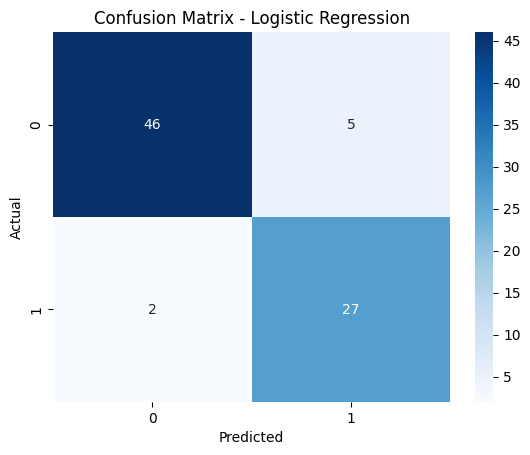

In [145]:
# Ploting confusion matrix
sns.heatmap(confusion_matrix(y_test, svm_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [146]:
import pickle

# Save trained logistic regression model
with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(log_model, model_file)

# Save fitted StandardScaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
